In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

apps = pd.read_csv("Datasets/apps.csv")

print("Total number of apps in the dataset = ", len(apps))

apps.head()

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
chars_to_remove = ["+", ",", "$"]
cols_to_clean = ["Installs", "Price"]

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))


apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [30]:
apps["Installs"] = apps["Installs"].astype(float)

apps["Price"] = apps["Price"].astype(float)

apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False).reset_index()
num_apps_in_category.columns = ["Category", "Count"]
num_apps_in_category = num_apps_in_category[num_apps_in_category["Count"] > 250]

num_apps_in_category.head()

Number of categories =  33


,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


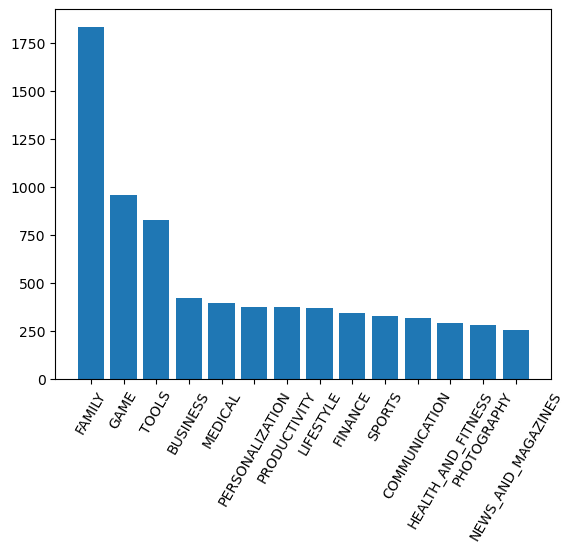

In [33]:
import matplotlib.pyplot as plt

plt.bar(num_apps_in_category["Category"], num_apps_in_category["Count"])
plt.xticks(rotation=60)
plt.show()

In [20]:
import plotly
import plotly.graph_objs as go

num_apps_in_category2 = apps['Category'].value_counts()

sorted_num_apps_in_category = num_apps_in_category2.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category2.index, # index = category name
        y = num_apps_in_category2.values, # value = count
)]

plotly.offline.iplot(data)

In [21]:
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

Average app rating =  4.173243045387994


(array([  17.,   18.,   39.,   73.,  132.,  439.,  833., 1493., 3450.,
        1702.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

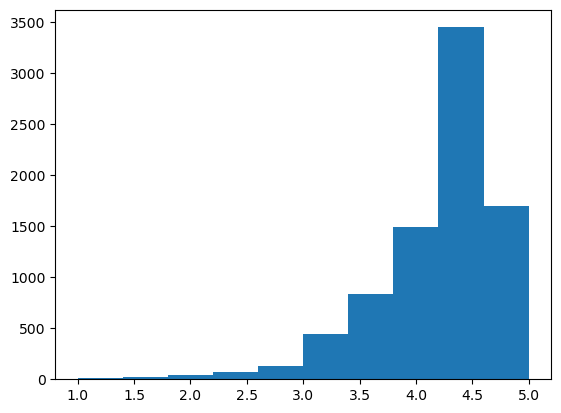

In [22]:
plt.hist(apps["Rating"])

In [34]:
data = [go.Histogram(x = apps['Rating'])]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

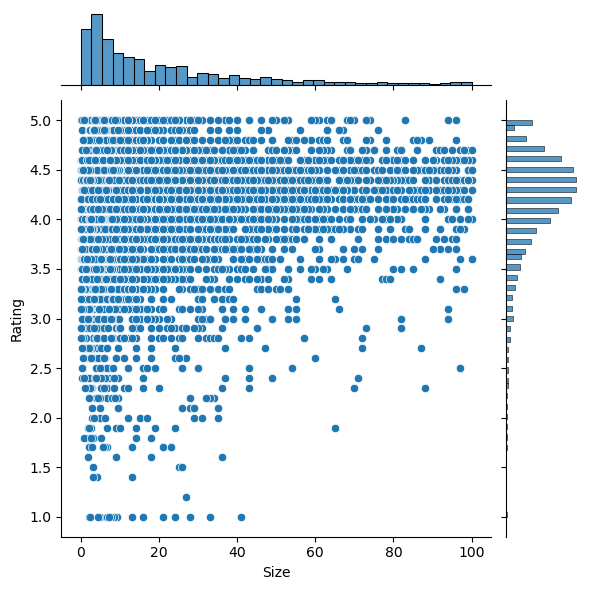

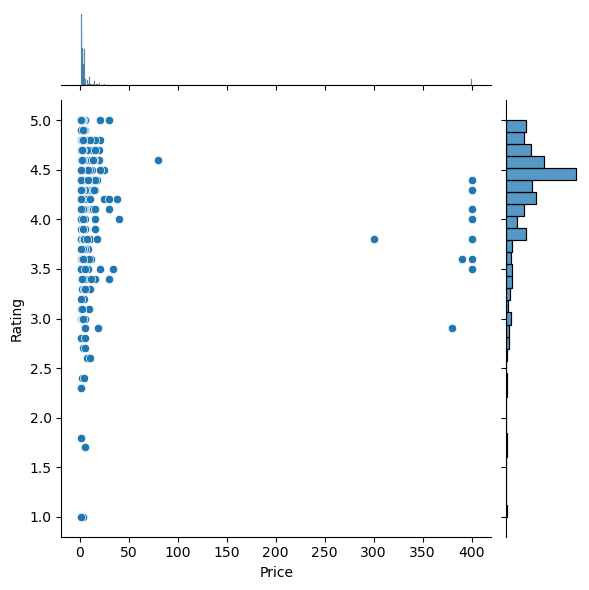

In [36]:
apps = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

plt1 = sns.jointplot(x = apps['Size'], y = apps['Rating'])

paid_apps = apps[apps['Type'] == 'Paid']
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

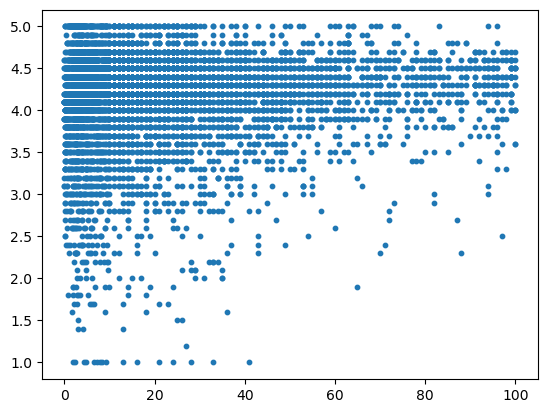

In [37]:
plt.scatter(apps["Size"], apps["Rating"], s=10)
plt.show()

In [25]:
paid_apps['Price'].describe()

count      541
unique      67
top       0.99
freq       103
Name: Price, dtype: object

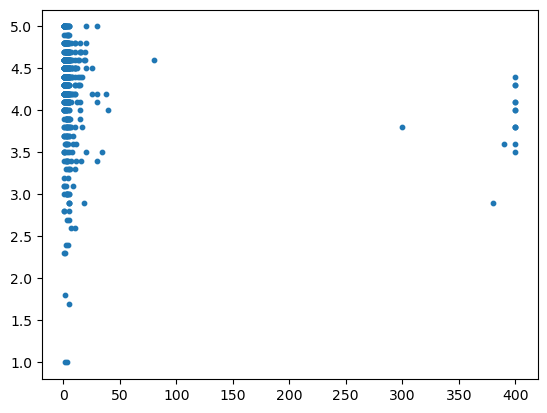

In [38]:
plt.scatter(paid_apps['Price'], paid_apps['Rating'], s=10)
plt.show()

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


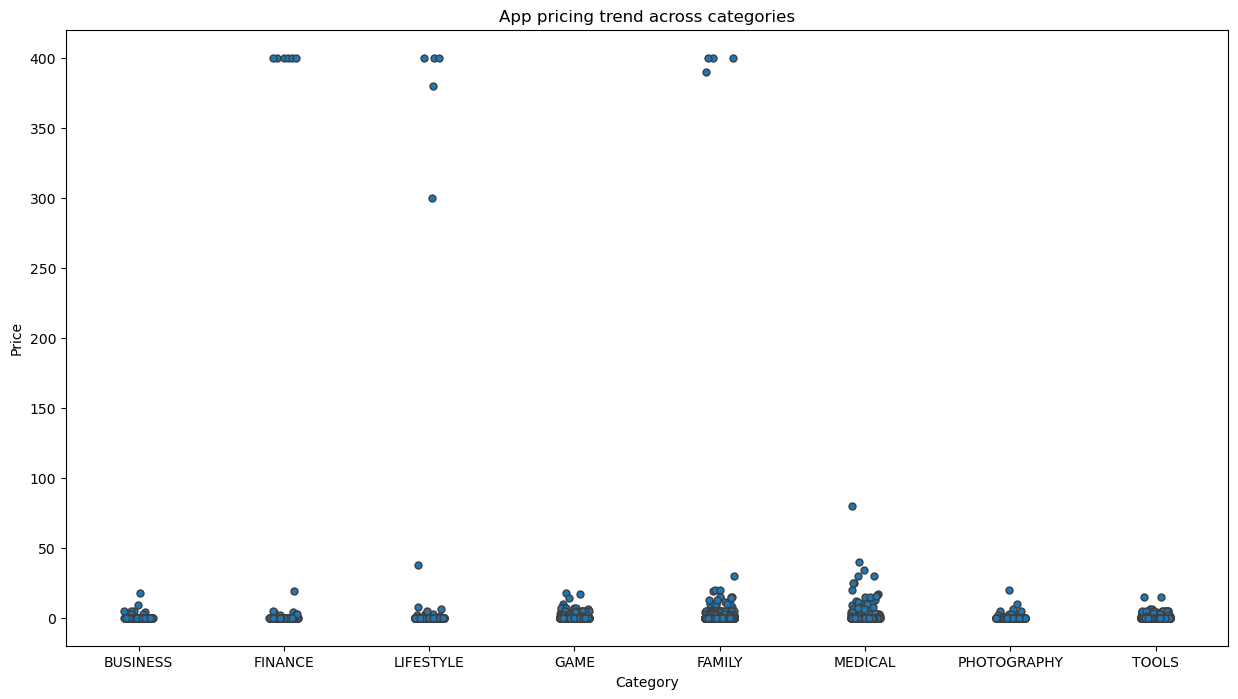

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(x = popular_app_cats["Category"], y = popular_app_cats["Price"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above_200 = apps[apps["Price"] > 200]
apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

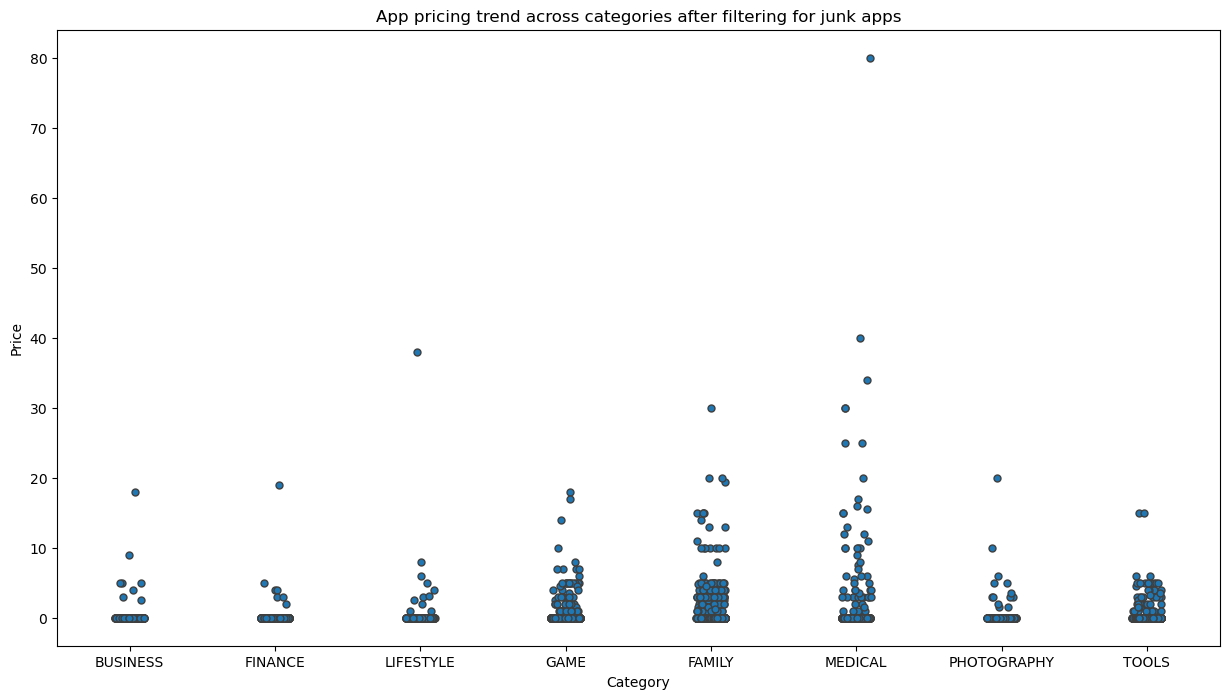

In [40]:
# Filter out "junk" apps
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = apps_under_100["Category"], y = apps_under_100["Price"], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [48]:
trace0 = go.Box(y=apps[apps["Type"] == "Paid"]["Installs"], name="Paid")

trace1 = go.Box(y=apps[apps["Type"] == "Free"]["Installs"], name="Free")

layout = go.Layout(title = "Number of downloads of paid apps vs. free apps",
                   yaxis = dict(title = "Log number of downloads",
                   type = "log",
                   autorange = True))

data = [trace0, trace1]
plotly.offline.iplot({"data" : data, "layout" : layout})

It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

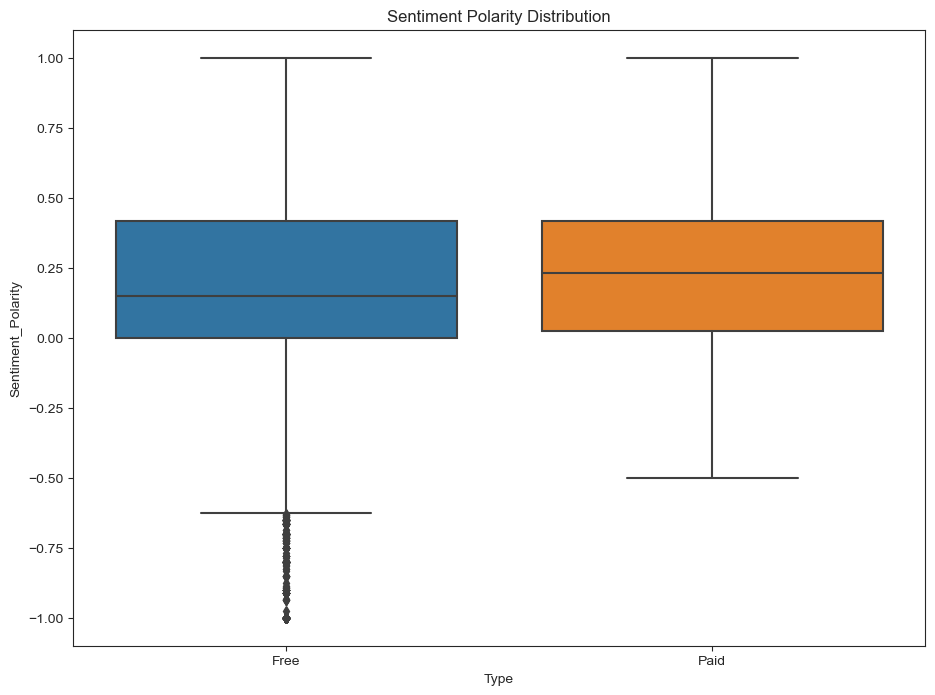

In [53]:
reviews_df = pd.read_csv('Datasets/user_reviews.csv')

merged_df = pd.merge(apps, reviews_df, on = "App")

merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style("ticks")
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title("Sentiment Polarity Distribution")

 By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.